In [1]:
#import uproot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cbook
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import scipy.integrate as integrate
#import pandas as pd
#from mpl_toolkits.mplot3d import axes3d 
#from scipy.optimize import curve_fit
#from scipy.stats import chisquare

Xm = np.loadtxt("136Xe_hsd_sums.txt")
Ym = np.loadtxt("136Xe_ssd_sums.txt")
#print(np.size(Xm))

In [2]:
n = len(Xm)
Esumhsd = np.zeros(n+1)
hsd = np.zeros(n+1)
Esumssd = np.zeros(n+1)
ssd = np.zeros(n+1)
ratiocp = np.zeros(n+1)


def norm(data,xmin,xmax):
    return (data)*len(data)/(np.sum(data)*(xmax-xmin))

#print(Xm[0][2])
for i in range(n):
    hsd[i] = Xm[i][2]
    Esumhsd[i] = Xm[i][1] * 1000
    ssd[i] = Ym[i][2]
    Esumssd[i] = Ym[i][1] * 1000
    
normhsd = norm(hsd,Esumhsd[0],max(Esumhsd)) 
normssd = norm(ssd,Esumhsd[0],max(Esumssd)) 

for i in range(n+1):
    ratiocp[i] = normhsd[i]/normssd[i]
    


<ipython-input-2-f7a37de2c6c4>:23: RuntimeWarning: invalid value encountered in double_scalars
  ratiocp[i] = normhsd[i]/normssd[i]


<ipython-input-3-52b31ec8d0c0>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


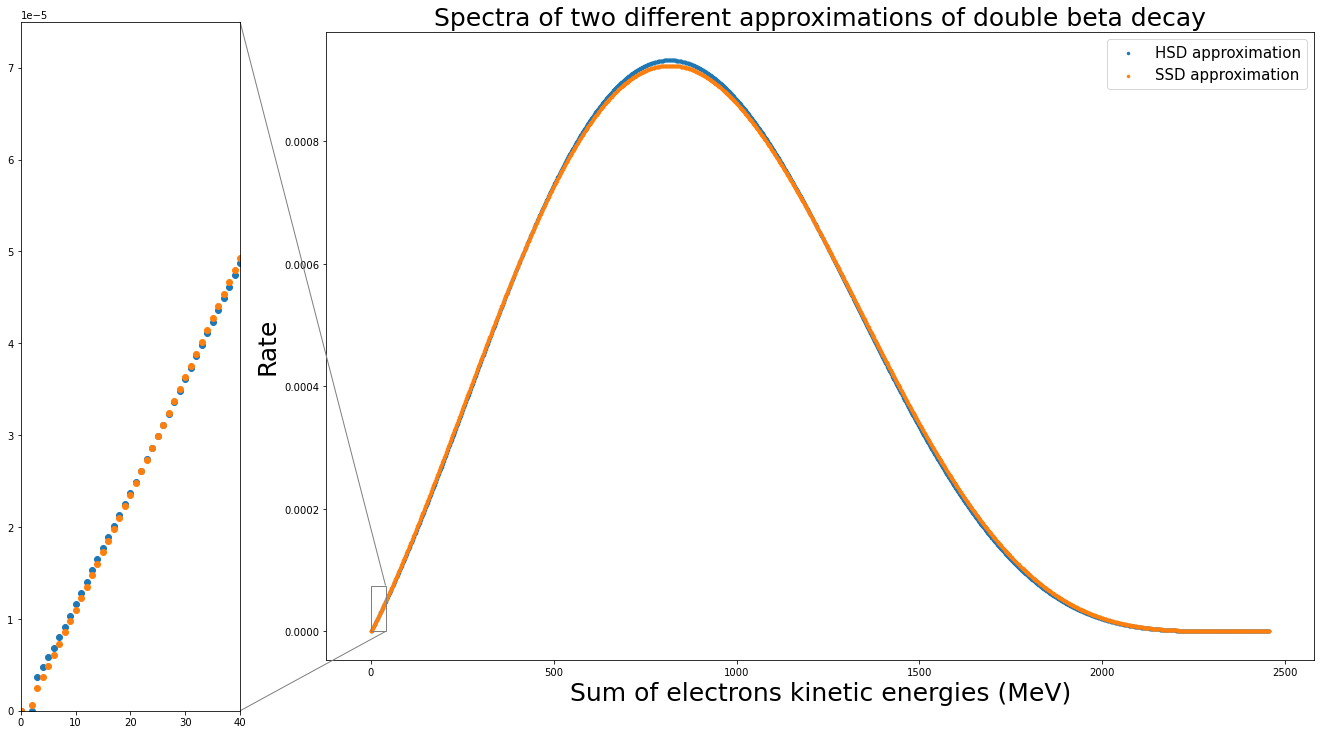

In [3]:
f, ax = plt.subplots(1, figsize=(15,10))

#ax.set_xticks(frontsize=15)
ax.scatter(Esumhsd, normhsd, linewidth=0.5, label='HSD approximation', marker='.')
ax.scatter(Esumssd, normssd, linewidth=0.5, label='SSD approximation', marker='.')

ax.set_title('Spectra of two different approximations of double beta decay', fontsize=25)
ax.set_xlabel('Sum of electrons kinetic energies (MeV)', fontsize=25)
ax.set_ylabel('Rate', fontsize=25)

# # Setup zoom window
axins = zoomed_inset_axes(ax, 15, loc=4, bbox_to_anchor=(0,0))
mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5")
axins.set_xlim([-0.02,40])
axins.set_ylim([0,0.000075])


# # Plot zoom window

axins.scatter(Esumhsd,normhsd)
axins.scatter(Esumssd,normssd)

# # Setup zoom window
#axins2 = zoomed_inset_axes(ax, 10, loc=2, bbox_to_anchor=(0,0))
#mark_inset(ax, axins2, loc1=1, loc2=4, fc="none", ec="0.5")
#axins2.set_xlim([2.4,2.46])
#axins2.set_ylim([-0.01,0.01])


# # Plot zoom window

#axins2.scatter(Esumhsd,norm(hsd))
#axins2.scatter(Esumssd,norm(ssd))


ax.legend(fontsize=15)


f.tight_layout()


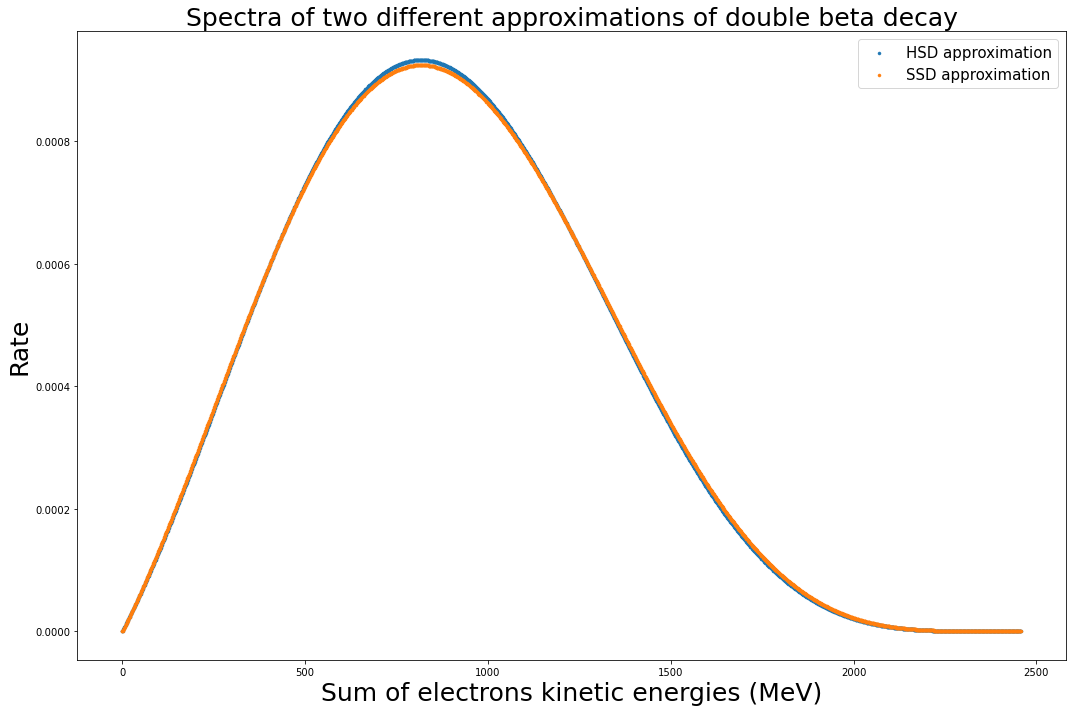

In [4]:
f, ax = plt.subplots(1, figsize=(15,10))

#ax.set_xticks(frontsize=15)
ax.scatter(Esumhsd, normhsd, linewidth=0.5, label='HSD approximation', marker='.')
ax.scatter(Esumssd, normssd, linewidth=0.5, label='SSD approximation', marker='.')

ax.set_title('Spectra of two different approximations of double beta decay', fontsize=25)
ax.set_xlabel('Sum of electrons kinetic energies (MeV)', fontsize=25)
ax.set_ylabel('Rate', fontsize=25)


ax.legend(fontsize=15)


f.tight_layout()


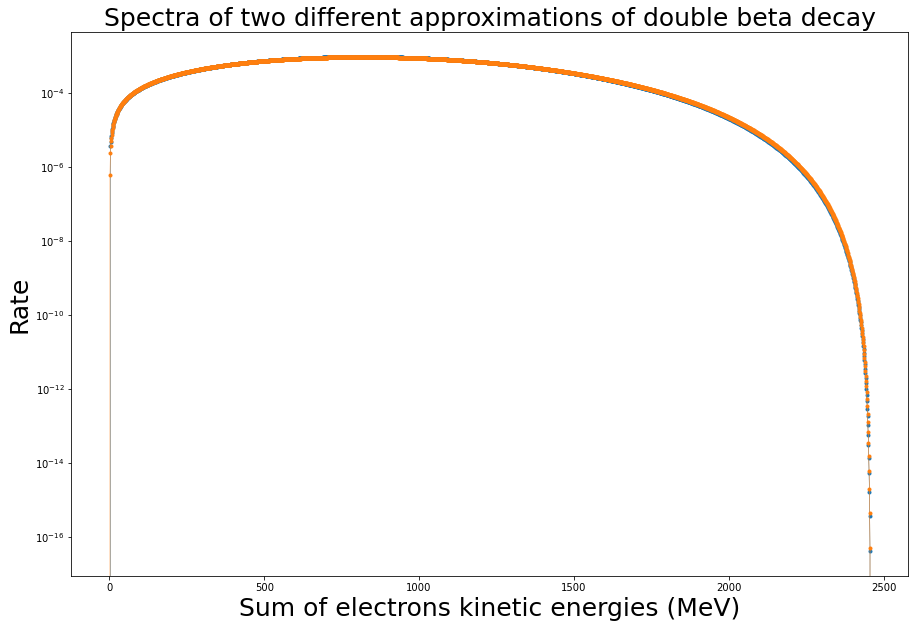

In [5]:
plt.figure(figsize=(15, 10))

plt.plot(Esumhsd, normhsd, linewidth=0.5, label='HSD approximation', marker='.')
plt.plot(Esumssd, normssd, linewidth=0.5, label='SSD approximation', marker='.')

plt.title('Spectra of two different approximations of double beta decay', fontsize=25)
plt.xlabel('Sum of electrons kinetic energies (MeV)', fontsize=25)
plt.ylabel('Rate', fontsize=25)
plt.yscale('log')

plt.show()

In [6]:
ratiocp = np.delete(ratiocp,0)
Esumssd = np.delete(Esumssd,0)
ratiocp = np.delete(ratiocp,0)
Esumssd = np.delete(Esumssd,0)

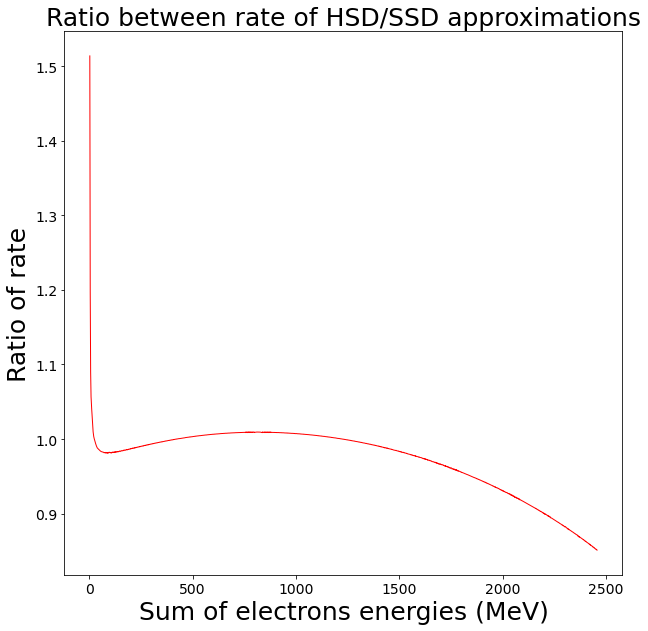

In [7]:
fig = plt.figure(figsize=(10,10))
plt.plot(Esumssd, ratiocp, 'red', linestyle='-', linewidth=1)
plt.title('Ratio between rate of HSD/SSD approximations', fontsize=25) 
plt.xlabel('Sum of electrons energies (MeV)', fontsize=25)
plt.ylabel('Ratio of rate', fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

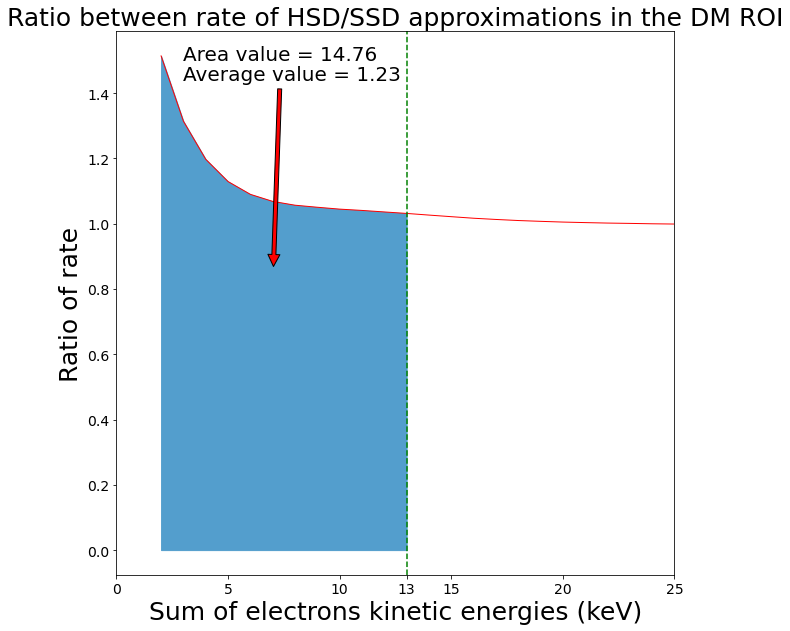

1.22985992016165


In [8]:
Esumssdkev = np.zeros(n)

for i in range (n):
    Esumssdkev[i] = Ym[i][1] * 1000

Esumssdkev = np.delete(Esumssdkev,0)

region = np.zeros(12)
region = ratiocp[:12]

int = np.trapz(region, dx=12/(12-Esumssdkev[0]))/12

fig = plt.figure(figsize=(10,10))

plt.gca().get_xaxis()
plt.gca().xaxis
axes = plt.gca() 
axes.set_xlim(0, 25)

plt.plot(Esumssdkev, ratiocp, 'red', linestyle='-', linewidth=1)
plt.title('Ratio between rate of HSD/SSD approximations in the DM ROI', fontsize=25) 
plt.xlabel('Sum of electrons kinetic energies (keV)', fontsize=25)
plt.ylabel('Ratio of rate', fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.axvline(x=13,color='green',linestyle='--')
plt.fill_between(Esumssdkev, ratiocp, where=Esumssdkev<14, color='#539ecd')
plt.xticks([0,5,10,13,15,20,25])

plt.annotate('Area value = 14.76',fontsize=20, xy = (7, 0.8), xytext = (3, 1.5),arrowprops = {'facecolor': 'red', 'shrink': 0.1})
plt.annotate('Average value = 1.23 ',fontsize=20, xy = (7, 0.8), xytext = (3, 1.44))

plt.show()

print(int)

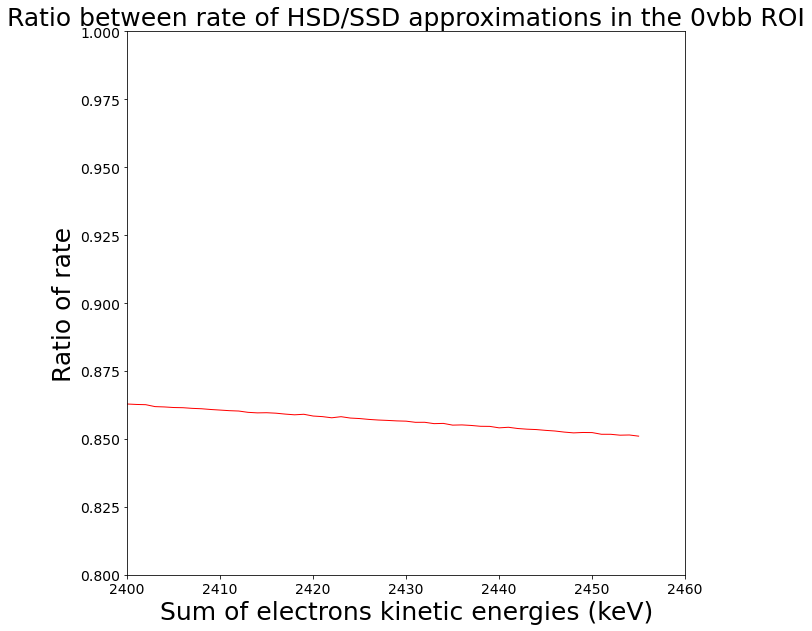

In [9]:
fig = plt.figure(figsize=(10,10))

plt.gca().get_xaxis()
plt.gca().xaxis
axes = plt.gca() 
axes.set_xlim(2400, 2460)
axes.set_ylim(0.8, 1.0)

plt.plot(Esumssdkev, ratiocp, 'red', linestyle='-', linewidth=1)
plt.title('Ratio between rate of HSD/SSD approximations in the 0vbb ROI', fontsize=25) 
plt.xlabel('Sum of electrons kinetic energies (keV)', fontsize=25)
plt.ylabel('Ratio of rate', fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [10]:
np.trapz(normhsd, dx=len(normhsd)/(max(Esumhsd)-Esumhsd[0]))

1.000814166463332